# Praca domowa 2
### Wczytanie pakietów i danych

In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data = pd.read_csv('allegro-api-transactions.csv')
data

,lp,date,item_id,categories,pay_option_on_delivery,pay_option_transfer,seller,price,it_is_allegro_standard,it_quantity,it_is_brand_zone,it_seller_rating,it_location,main_category
0,0,2016-04-03 21:21:08,4753602474,"['Komputery', 'Dyski i napędy', 'Nośniki', 'No...",1,1,radzioch666,59.99,1,997,0,50177,Warszawa,Komputery
1,1,2016-04-03 15:35:26,4773181874,"['Odzież, Obuwie, Dodatki', 'Bielizna damska',...",1,1,InwestycjeNET,4.90,1,9288,0,12428,Warszawa,"Odzież, Obuwie, Dodatki"
2,2,2016-04-03 14:14:31,4781627074,"['Dom i Ogród', 'Budownictwo i Akcesoria', 'Śc...",1,1,otostyl_com,109.90,1,895,0,7389,Leszno,Dom i Ogród
3,3,2016-04-03 19:55:44,4783971474,"['Książki i Komiksy', 'Poradniki i albumy', 'Z...",1,1,Matfel1,18.50,0,971,0,15006,Wola Krzysztoporska,Książki i Komiksy
4,4,2016-04-03 18:05:54,4787908274,"['Odzież, Obuwie, Dodatki', 'Ślub i wesele', '...",1,1,PPHU_RICO,19.90,1,950,0,32975,BIAŁYSTOK,"Odzież, Obuwie, Dodatki"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
420015,420015,2016-04-03 20:27:13,6099625607,"['RTV i AGD', 'Sprzęt audio dla domu', 'Odtwar...",0,0,iwona7012,180.00,0,0,0,176,Kraśnik,RTV i AGD
420016,420016,2016-04-03 22:35:02,6099634607,"['Uroda', 'Makijaż', 'Oczy', 'Tusze do rzęs']",1,1,Dolce_Cosmetics,14.99,1,2,0,34851,Dzierżoniów,Uroda
420017,420017,2016-04-03 22:38:57,6099780407,"['Odzież, Obuwie, Dodatki', 'Przebrania, kosti...",1,1,pewex4all,5.99,1,470,0,983,Supraśl,"Odzież, Obuwie, Dodatki"
420018,420018,2016-04-03 22:44:17,6099801007,"['Dla Dzieci', 'Rowery i pojazdy', 'Rowery bie...",1,0,kostasia,200.00,0,0,0,163,Poznań,Dla Dzieci


## Część pierwsza

In [3]:
len(data.it_location.unique())

10056

Widzimy, że jest bardzo dużo kategorii. Prawdopodobnie będzie można zredukować ich liczbę.

### Przygotowanie kolumny `it_location` do zakodowania

In [4]:
data['it_location'] = data['it_location'].str.lower()
data['it_location'] = data['it_location'].str.strip()
len(data['it_location'].unique())

7619

In [5]:
import category_encoders as ce

data_tg_enc = data.copy()

Y = data_tg_enc.price
X = data_tg_enc.drop(columns=['price'])

target_encoder = ce.TargetEncoder(cols=['it_location'])
target_encoder.fit(X, Y)
data_tg_enc = target_encoder.transform(X)

c:\users\marys\appdata\local\programs\python\python38\lib\site-packages\category_encoders\utils.py:21: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  elif pd.api.types.is_categorical(cols):


In [6]:
data_tg_enc

,lp,date,item_id,categories,pay_option_on_delivery,pay_option_transfer,seller,it_is_allegro_standard,it_quantity,it_is_brand_zone,it_seller_rating,it_location,main_category
0,0,2016-04-03 21:21:08,4753602474,"['Komputery', 'Dyski i napędy', 'Nośniki', 'No...",1,1,radzioch666,1,997,0,50177,84.128595,Komputery
1,1,2016-04-03 15:35:26,4773181874,"['Odzież, Obuwie, Dodatki', 'Bielizna damska',...",1,1,InwestycjeNET,1,9288,0,12428,84.128595,"Odzież, Obuwie, Dodatki"
2,2,2016-04-03 14:14:31,4781627074,"['Dom i Ogród', 'Budownictwo i Akcesoria', 'Śc...",1,1,otostyl_com,1,895,0,7389,65.180279,Dom i Ogród
3,3,2016-04-03 19:55:44,4783971474,"['Książki i Komiksy', 'Poradniki i albumy', 'Z...",1,1,Matfel1,0,971,0,15006,35.433365,Książki i Komiksy
4,4,2016-04-03 18:05:54,4787908274,"['Odzież, Obuwie, Dodatki', 'Ślub i wesele', '...",1,1,PPHU_RICO,1,950,0,32975,73.673205,"Odzież, Obuwie, Dodatki"
...,...,...,...,...,...,...,...,...,...,...,...,...,...
420015,420015,2016-04-03 20:27:13,6099625607,"['RTV i AGD', 'Sprzęt audio dla domu', 'Odtwar...",0,0,iwona7012,0,0,0,176,26.346402,RTV i AGD
420016,420016,2016-04-03 22:35:02,6099634607,"['Uroda', 'Makijaż', 'Oczy', 'Tusze do rzęs']",1,1,Dolce_Cosmetics,1,2,0,34851,66.179972,Uroda
420017,420017,2016-04-03 22:38:57,6099780407,"['Odzież, Obuwie, Dodatki', 'Przebrania, kosti...",1,1,pewex4all,1,470,0,983,18.682800,"Odzież, Obuwie, Dodatki"
420018,420018,2016-04-03 22:44:17,6099801007,"['Dla Dzieci', 'Rowery i pojazdy', 'Rowery bie...",1,0,kostasia,0,0,0,163,104.104485,Dla Dzieci


### Target Encoding
#### Zalety
Nie dodaje kolejnych wymiarów do dataframe'u, co jest bardzo istotne przy dużej liczbie kategorii.
Jest to jego główna przewaga nad One Hot Encoding.

#### Wady
Łatwo dochodzi do overfittingu; szczególnie przy dużej liczbie kategorii, które zawierają mało obserwacji.

## Kodowanie kolumny `main_category`
### One Hot Encoder
Widzimy, że w tej kolumnie jest dużo mniej kategorii niż w `it_location`. Zatem nadaje się ona do tego typu kodowania.

In [7]:
len(data['main_category'].unique())

27

In [10]:
oh_encoder = ce.OneHotEncoder(cols=['main_category'])
oh_encoder.fit(data)
data_oh_enc = oh_encoder.transform(data)

In [11]:
data_oh_enc.shape

(420020, 40)

### Ordinal Encoder
Nadaje numery, każdej kategorii w porządku rosnącym. Ma to sens jeśli wśród kategorii istnieje jakiś porządek.
Poniżej zostało użyte to kodowanie w dwóch przypadkach:
1. Nie definiujemy porządku, kodowanie nie ma za bardzo sensu.
2. Porządkujemy kategorie względem najwyższej średniej ceny w obrębie kategorii, a następnie przyporządkowujemy numery.

In [12]:
X = data.drop(columns=['price'])
Y = data.price

ord_encoder = ce.OrdinalEncoder(cols=['main_category'])
data_ord_enc = ord_encoder.fit_transform(X, Y)

c:\users\marys\appdata\local\programs\python\python38\lib\site-packages\category_encoders\utils.py:21: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  elif pd.api.types.is_categorical(cols):


In [13]:
data_ord_enc

,lp,date,item_id,categories,pay_option_on_delivery,pay_option_transfer,seller,it_is_allegro_standard,it_quantity,it_is_brand_zone,it_seller_rating,it_location,main_category
0,0,2016-04-03 21:21:08,4753602474,"['Komputery', 'Dyski i napędy', 'Nośniki', 'No...",1,1,radzioch666,1,997,0,50177,warszawa,1
1,1,2016-04-03 15:35:26,4773181874,"['Odzież, Obuwie, Dodatki', 'Bielizna damska',...",1,1,InwestycjeNET,1,9288,0,12428,warszawa,2
2,2,2016-04-03 14:14:31,4781627074,"['Dom i Ogród', 'Budownictwo i Akcesoria', 'Śc...",1,1,otostyl_com,1,895,0,7389,leszno,3
3,3,2016-04-03 19:55:44,4783971474,"['Książki i Komiksy', 'Poradniki i albumy', 'Z...",1,1,Matfel1,0,971,0,15006,wola krzysztoporska,4
4,4,2016-04-03 18:05:54,4787908274,"['Odzież, Obuwie, Dodatki', 'Ślub i wesele', '...",1,1,PPHU_RICO,1,950,0,32975,białystok,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
420015,420015,2016-04-03 20:27:13,6099625607,"['RTV i AGD', 'Sprzęt audio dla domu', 'Odtwar...",0,0,iwona7012,0,0,0,176,kraśnik,6
420016,420016,2016-04-03 22:35:02,6099634607,"['Uroda', 'Makijaż', 'Oczy', 'Tusze do rzęs']",1,1,Dolce_Cosmetics,1,2,0,34851,dzierżoniów,9
420017,420017,2016-04-03 22:38:57,6099780407,"['Odzież, Obuwie, Dodatki', 'Przebrania, kosti...",1,1,pewex4all,1,470,0,983,supraśl,2
420018,420018,2016-04-03 22:44:17,6099801007,"['Dla Dzieci', 'Rowery i pojazdy', 'Rowery bie...",1,0,kostasia,0,0,0,163,poznań,8


### Ordinal Encoder z nadanym porządkiem

In [14]:
categories_mean = data.groupby('main_category')['price'].mean(['price']) \
    .sort_values() \
    .reset_index(name='mean')

categories = categories_mean['main_category'].tolist()

In [15]:
categories_dict = dict(zip(categories, np.arange(1, len(categories) + 1)))
categories_dict

{'Nieruchomości': 1,
 'Rękodzieło': 2,
 'Delikatesy': 3,
 'Książki i Komiksy': 4,
 'Uroda': 5,
 'Filmy': 6,
 'Biuro i Reklama': 7,
 'Muzyka': 8,
 'Gry': 9,
 'Zdrowie': 10,
 'Kolekcje': 11,
 'Biżuteria i Zegarki': 12,
 'Dla Dzieci': 13,
 'Dom i Ogród': 14,
 'Odzież, Obuwie, Dodatki': 15,
 'Przemysł': 16,
 'Telefony i Akcesoria': 17,
 'Bilety': 18,
 'Sport i Turystyka': 19,
 'RTV i AGD': 20,
 'Antyki i Sztuka': 21,
 'Komputery': 22,
 'Sprzęt estradowy, studyjny i DJ-ski': 23,
 'Motoryzacja': 24,
 'Fotografia': 25,
 'Instrumenty': 26,
 'Konsole i automaty': 27}

In [16]:
ord_encoder_2 = ce.OrdinalEncoder(cols=['main_category'], mapping=[{'col': 'main_category', 'mapping': categories_dict}])
data_ord_enc_2 = ord_encoder_2.fit_transform(data)
data_ord_enc_2.shape

c:\users\marys\appdata\local\programs\python\python38\lib\site-packages\category_encoders\utils.py:21: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  elif pd.api.types.is_categorical(cols):


(420020, 14)

### CatBoost Encoder
Przechodzi po danych tylko raz kodując je w locie.
Dane nie mogą byc posortowane, dlatego przed użyciem warto je losowo przemieszać.

In [17]:
perm = np.random.permutation(len(X)) 
X = X.iloc[perm].reset_index(drop=True) 
Y = Y.iloc[perm].reset_index(drop=True)

In [18]:
cb_encoder = ce.CatBoostEncoder(cols=['main_category'])
data_cb_encoded = cb_encoder.fit_transform(X, Y)

In [32]:
pd.merge(data_cb_encoded, Y, left_on='lp', right_index=True)

,lp,date,item_id,categories,pay_option_on_delivery,pay_option_transfer,seller,it_is_allegro_standard,it_quantity,it_is_brand_zone,it_seller_rating,it_location,main_category,price
0,88735,2016-04-03 14:23:02,5089336373,"['Dom i Ogród', 'Ogród', 'Narzędzia ogrodnicze...",1,1,Tadek_Sprzedawca,1,9397,0,62043,zawiercie,76.811350,94.90
1,413003,2016-04-03 23:38:00,5936209402,"['Biżuteria i Zegarki', 'Akcesoria', 'Szkatułk...",1,1,LadyAga31,0,89,0,7919,zawiercie,76.811350,1.00
2,316584,2016-04-03 18:41:44,5591678417,"['Dom i Ogród', 'Ogród', 'Nawadnianie', 'Węże ...",1,1,tanio-wysylamy,0,481,0,64374,warszawa,237.905675,31.80
3,270208,2016-04-03 11:52:35,6083927536,"['Odzież, Obuwie, Dodatki', 'Obuwie', 'Damskie...",1,0,am_sport3,0,23,0,89,nowy sącz,76.811350,79.00
4,344276,2016-04-03 20:35:10,6022556928,"['Dom i Ogród', 'Ogród', 'Nawadnianie', 'Przew...",1,1,ahs_pl,1,19,0,1177,śrem,166.933783,1.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
420015,333309,2016-04-03 15:05:58,5721398721,"['Motoryzacja', 'Części samochodowe', 'Wyposaż...",1,1,ZDROWIE--URODA,1,155,0,872,chełmek,134.430148,20.00
420016,215161,2016-04-03 20:23:33,5620349030,"['Dom i Ogród', 'Ogród', 'Rośliny', 'Rośliny o...",1,1,podkarpackiesady,1,241,0,9810,dębica,72.436164,39.99
420017,315492,2016-04-03 19:05:44,6046988214,"['Telefony i Akcesoria', 'Akcesoria GSM', 'Pok...",1,1,caro-net_pl,0,98,0,20973,piekary śląskie,81.366917,35.75
420018,199257,2016-04-03 22:41:59,6070115338,"['Motoryzacja', 'Części motocyklowe', 'Części ...",1,0,szulik_2006,0,0,0,496,łódź,134.427646,69.99


## Część druga
### Uzupełnianie braków

In [33]:
df = data.loc[:, ['price', 'it_seller_rating', 'it_quantity']]
df

,price,it_seller_rating,it_quantity
0,59.99,50177,997
1,4.90,12428,9288
2,109.90,7389,895
3,18.50,15006,971
4,19.90,32975,950
...,...,...,...
420015,180.00,176,0
420016,14.99,34851,2
420017,5.99,983,470
420018,200.00,163,0


In [34]:
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
import warnings
warnings.filterwarnings('ignore')

In [35]:
def imput_evaluation(num_iterations=10):
    RMSE = np.zeros(num_iterations)
    for i in range(num_iterations):
        df_temp = df.copy()
        sample = df_temp['it_seller_rating'].sample(frac=0.1, replace=False)
        df_temp['it_seller_rating'].loc[df_temp.index.isin(sample.index)] = np.nan
        
        imp = IterativeImputer(max_iter=10, random_state=0)
        imp.fit(df_temp)
        prediction = imp.transform(df_temp)
        prediction = pd.DataFrame(prediction, columns=['price', 'it_seller_rating', 'it_quantity'])
        RMSE[i] = np.sqrt(np.sum(np.square(df['it_seller_rating'] - prediction['it_seller_rating'])) / len(prediction))
        
    RMSE_final = np.sum(RMSE) / num_iterations
    std = RMSE.std()
    return std, RMSE, RMSE_final
        

In [36]:
def imput_evaluation_2(num_iterations=10):
    RMSE = np.zeros(num_iterations)
    for i in range(num_iterations):
        df_temp = df.copy()
        sample = df_temp['it_seller_rating'].sample(frac=0.1, replace=False)
        sample_2 = df_temp['it_quantity'].sample(frac=0.1, replace=False)
        
        df_temp['it_seller_rating'].loc[df_temp.index.isin(sample.index)] = np.nan
        df_temp['it_quantity'].loc[df_temp.index.isin(sample_2.index)] = np.nan
        
        imp = IterativeImputer(max_iter=10, random_state=0)
        imp.fit(df_temp)
        prediction = imp.transform(df_temp)
        prediction = pd.DataFrame(prediction, columns=['price', 'it_seller_rating', 'it_quantity'])
        RMSE[i] = np.sqrt(np.sum(np.square(df['it_seller_rating'] - prediction['it_seller_rating'])) / len(prediction))
        
    RMSE_final = np.sum(RMSE) / num_iterations
    std = RMSE.std()
    return std, RMSE, RMSE_final

In [37]:
results = imput_evaluation()
results_2 = imput_evaluation_2()

In [38]:
print(f'Braki w kolumnie it_seller_rating \
STD: {round(results[0], 2)} \
średnie RMSE: {round(results[2], 2)}')
print(f'Braki w kolumnach it_seller_rating i it_quantity \
STD: {round(results_2[0], 2)} \
średnie RMSE: {round(results_2[2], 2)}')

Braki w kolumnie it_seller_rating STD: 61.94 średnie RMSE: 11589.29
Braki w kolumnach it_seller_rating i it_quantity STD: 54.97 średnie RMSE: 11680.27


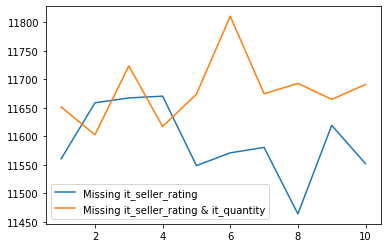

In [39]:
sns.lineplot(x=np.arange(1, 11), y=results[1], label='Missing it_seller_rating')
sns.lineplot(x=np.arange(1, 11), y=results_2[1], label='Missing it_seller_rating & it_quantity')

plt.legend()
plt.show()

## Podsumowanie
W przypadku, gdy brakuje danych tylko w jednej kolumnie, błąd jest mniejszy, ponieważ uzupełniając brakujące wartości algorytm może się sugerować pozostałymi kolumnami.
W sytuacji w której występują braki również w kolumnie `it_quantity` błąd jest większy, ponieważ jest mniej danych z których można coś wyciągnąć.